<a href="https://colab.research.google.com/github/alsh02/fuzzy-transfrom/blob/main/Function_Approximation_using_Fuzzy_Transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [209]:
import matplotlib.pyplot as plt
import numpy as np

In [210]:
n = 4
a = 1
b = 3
universe = np.linspace(a, b)
nodes = np.linspace(a, b, n)
h = nodes[1] - nodes[0] # uniform인 경우

In [211]:
for idx, node in enumerate(nodes):
    print(f"인덱스: {idx}, 노드: {node}")

인덱스: 0, 노드: 1.0
인덱스: 1, 노드: 1.6666666666666665
인덱스: 2, 노드: 2.333333333333333
인덱스: 3, 노드: 3.0


In [212]:
def basic_function(x, node, distance):
    return 0.5 * (np.cos(np.pi * (x - node) / distance) + 1)

In [213]:
# 구간 설정
intervals = [np.linspace(a, nodes[1], 250)]
for i in range(n - 2):
    intervals.append(np.linspace(nodes[i], nodes[i + 2], 500))
intervals.append(np.linspace(nodes[n - 2], b, 250))

print(f"구간의 개수는 {len(intervals)}")

for interval in intervals:
    print(min(interval), max(interval))

구간의 개수는 4
1.0 1.6666666666666665
1.0 2.333333333333333
1.6666666666666665 3.0
2.333333333333333 3.0


In [214]:
A = []
for i, interval in enumerate(intervals):
    node = nodes[i]
    print(node)
    A.append(basic_function(interval, node, h))

1.0
1.6666666666666665
2.333333333333333
3.0


In [215]:
len(A)

4

In [216]:
for i, Ak in enumerate(A):
    if i == 0 or i == n - 1:
        print(f"{i + 1}번째 노드 {nodes[i]}일 때 A{i + 1}의 함숫값", Ak[249])
    else:
        print(f"{i + 1}번째 노드 {nodes[i]}일 때 A{i + 1}의 함숫값", Ak[249])
        print(f"{i + 1}번째 노드 {nodes[i]}일 때 A{i + 1}의 함숫값", Ak[499])

1번째 노드 1.0일 때 A1의 함숫값 0.0
2번째 노드 1.6666666666666665일 때 A2의 함숫값 0.9999900908311601
2번째 노드 1.6666666666666665일 때 A2의 함숫값 0.0
3번째 노드 2.333333333333333일 때 A3의 함숫값 0.9999900908311601
3번째 노드 2.333333333333333일 때 A3의 함숫값 0.0
4번째 노드 3.0일 때 A4의 함숫값 1.0


In [217]:
plt.style.use("ggplot")

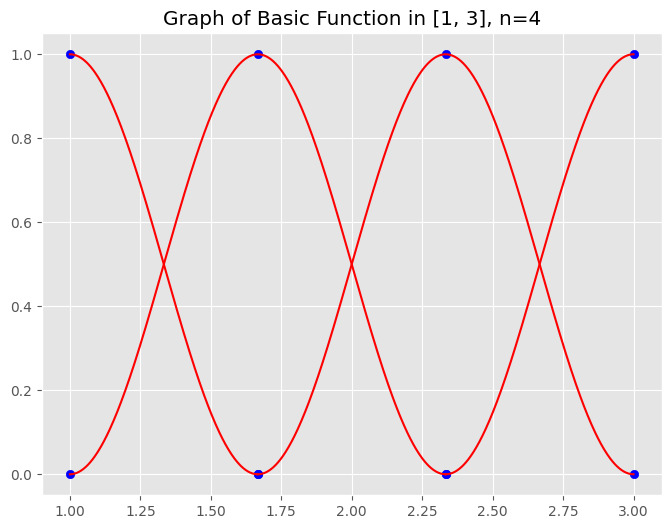

In [218]:
plt.figure(figsize=(8, 6))
plt.title(f"Graph of Basic Function in [{a}, {b}], n={n}")

for i, interval in enumerate(intervals):
    plt.plot(interval, A[i], 'r')

function_values = []

for i, Ak in enumerate(A):
    if i == 0:
        function_values.append((nodes[i], Ak[0]))
        function_values.append((nodes[i + 1], Ak[249]))
        plt.scatter(nodes[i], Ak[0], color='b')
        plt.scatter(nodes[i + 1], Ak[249], color='b')
    elif 0 < i < n - 1:
        function_values.append((nodes[i - 1], Ak[0]))
        function_values.append((nodes[i], Ak[249]))
        function_values.append((nodes[i + 1], Ak[499]))
        plt.scatter(nodes[i - 1], Ak[0], color='b')
        plt.scatter(nodes[i], Ak[249], color='b')
        plt.scatter(nodes[i + 1], Ak[499], color='b')
    else:
        function_values.append((nodes[i - 1], Ak[0]))
        function_values.append((nodes[i], Ak[249]))
        plt.scatter(nodes[i - 1], Ak[0], color='b')
        plt.scatter(nodes[i], Ak[249], color='b')

In [219]:
def function(x):
    return ((x - 1) ** 2) * ((x - 3) ** 2) * (2 * x - 3) + 6

In [220]:
A = []
A.append(function_values[:2])

middle_values = function_values[2:-2]
for i in range(0, len(middle_values), 3):
    A.append(middle_values[i : i + 3])

A.append(function_values[-2:])

for i, Ak in enumerate(A, start=1):
    print(f"A{i}: {Ak}")

A1: [(1.0, 1.0), (1.6666666666666665, 0.0)]
A2: [(1.0, 0.0), (1.6666666666666665, 0.9999900908311601), (2.333333333333333, 0.0)]
A3: [(1.6666666666666665, 0.0), (2.333333333333333, 0.9999900908311601), (3.0, 0.0)]
A4: [(2.333333333333333, 0.0), (3.0, 1.0)]


In [221]:
def fuzzy_transform(nodes, A):
    transforms = []
    for Ak in A: # k = 1 ~ n
        result = 0
        for node in nodes:
            for coordinate in Ak:
                if coordinate[0] == node:
                    result += function(node) * coordinate[1]
                    break
        transforms.append(result)

    return transforms

In [222]:
transforms = fuzzy_transform(nodes, A)
print(transforms)

[6.0, 6.263312420761422, 7.3167999238592705, 6.0]


In [223]:
def inverse_fuzzy_transform(nodes, transforms, A):
    approximation = []
    for node in nodes:
        result = 0
        for i, Ak in enumerate(A):
            for coordinate in Ak:
                if coordinate[0] == node:
                    result += transforms[i] * coordinate[1]
                    break
        approximation.append(result)

    return approximation

In [224]:
approximation = fuzzy_transform(nodes, A)
print(inverse_fuzzy_transform(nodes, transforms, A))

[6.0, 6.263250356541148, 7.316727420453457, 6.0]


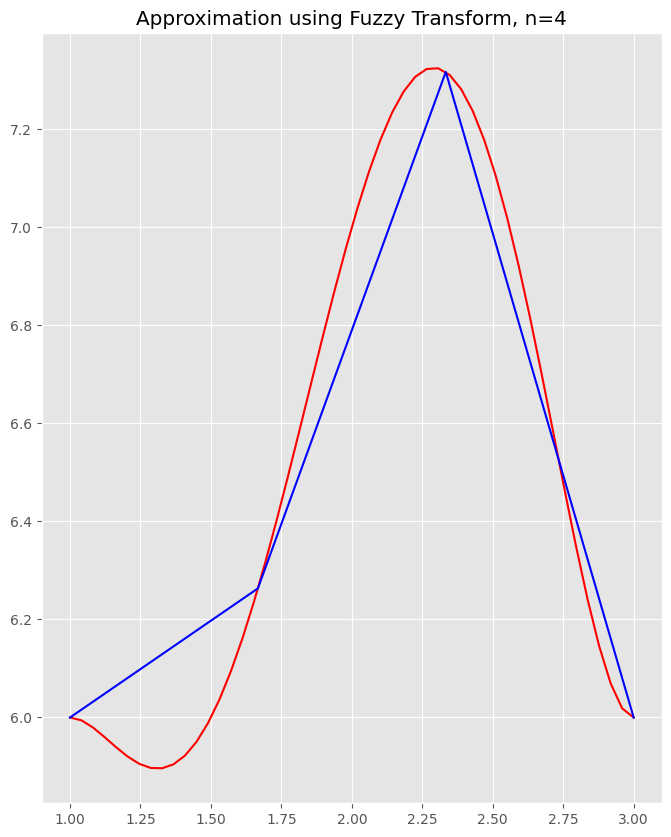

In [225]:
plt.figure(figsize=(8, 10))
plt.title(f"Approximation using Fuzzy Transform, n={n}")
plt.plot(universe, function(universe), 'r-')
plt.plot(nodes, approximation, color='b')